# Customer Trend Analysis

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load Dataset
df = pd.read_csv("dataset/customer_trends.csv")
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [4]:
df.describe(include='all')

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Credit Card,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,696,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.749949,NaN,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716223,NaN,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


In [5]:
# Check null values
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [6]:
# Rename columns
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')
df = df.rename(columns={'purchase_amount_(usd)':'purchase_amount'})

In [7]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'payment_method',
       'shipping_type', 'discount_applied', 'promo_code_used',
       'previous_purchases', 'preferred_payment_method',
       'frequency_of_purchases'],
      dtype='object')

In [8]:
# Divide Age group and rename column
labels = ['Young Adult', 'Adult', 'Middle-aged', 'Senior']
df['age_group'] = pd.qcut(df['age'], q=4, labels = labels)

In [9]:
df[['age','age_group']].head(10)

,age,age_group
0,55,Middle-aged
1,19,Young Adult
2,50,Middle-aged
3,21,Young Adult
4,45,Middle-aged
5,46,Middle-aged
6,63,Senior
7,27,Young Adult
8,26,Young Adult
9,57,Middle-aged


In [10]:
# Use frequency map to change 'frequency_of_purchases' columns

freq_map = {
    'Fortnightly': 14,
    'Weekly': 7,
    'Monthly': 30,
    'Quarterly': 90,
    'Bi-Weekly': 14,
    'Annually': 365,
    'Every 3 Months': 90
}

df['purchase_frequency_days'] = df['frequency_of_purchases'].map(freq_map)

In [11]:
df[['purchase_frequency_days','frequency_of_purchases']].head(10)

,purchase_frequency_days,frequency_of_purchases
0,14,Fortnightly
1,14,Fortnightly
2,7,Weekly
3,7,Weekly
4,365,Annually
5,7,Weekly
6,90,Quarterly
7,7,Weekly
8,365,Annually
9,90,Quarterly


In [12]:
df[['discount_applied','promo_code_used']].head(10)

,discount_applied,promo_code_used
0,Yes,Yes
1,Yes,Yes
2,Yes,Yes
3,Yes,Yes
4,Yes,Yes
5,Yes,Yes
6,Yes,Yes
7,Yes,Yes
8,Yes,Yes
9,Yes,Yes


In [13]:
# Verify if these columns have same values for all rows
(df['discount_applied'] == df['promo_code_used']).all()

np.True_

# EDA using python

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

## How do customer demographics influence purchasing behavior?

In [15]:
age_gender_spend = (df.groupby(['age_group','gender'])['purchase_amount'].mean().reset_index())
age_gender_spend.head(8)

/tmp/ipykernel_2817/4087563411.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_spend = (df.groupby(['age_group','gender'])['purchase_amount'].mean().reset_index())


,age_group,gender,purchase_amount
0,Young Adult,Female,61.975385
1,Young Adult,Male,59.745377
2,Adult,Female,59.196667
3,Adult,Male,59.531153
4,Middle-aged,Female,59.477477
5,Middle-aged,Male,60.323124
6,Senior,Female,60.289655
7,Senior,Male,58.530581


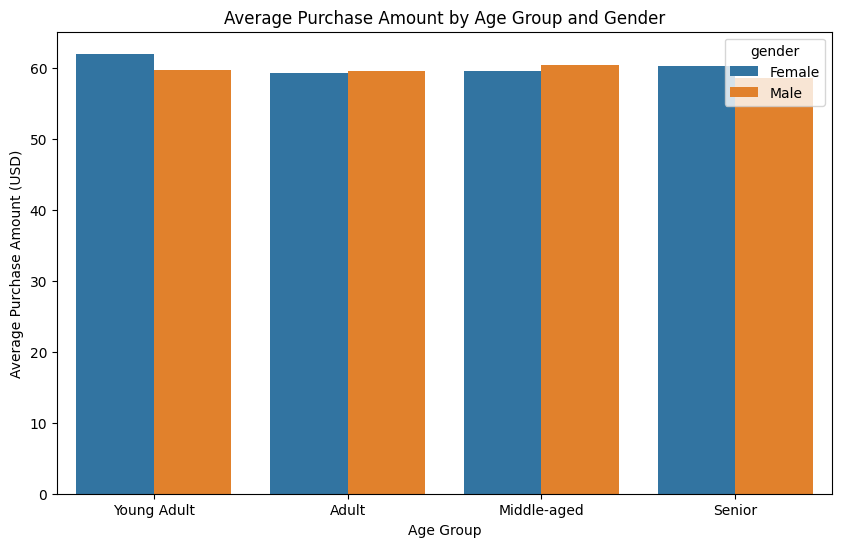

In [16]:
plt.figure(figsize = (10,6))
sns.barplot(age_gender_spend,
            x = 'age_group',
            y = 'purchase_amount',
            hue = "gender")
plt.title('Average Purchase Amount by Age Group and Gender')
plt.ylabel('Average Purchase Amount (USD)')
plt.xlabel('Age Group')
plt.show()

## Which product categories and items drive the most revenue and engagement?

In [17]:
category_spend = (df.groupby('category')['purchase_amount'].sum().sort_values(ascending =False).reset_index())
category_spend.head(8)

,category,purchase_amount
0,Clothing,104264
1,Accessories,74200
2,Footwear,36093
3,Outerwear,18524


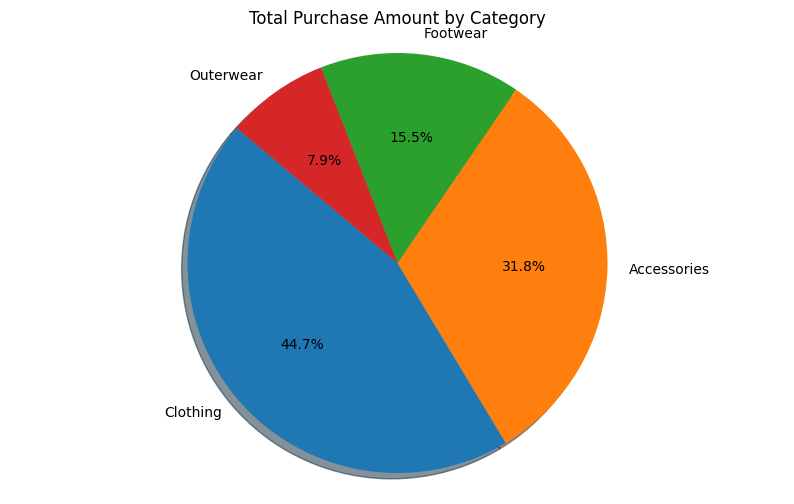

In [18]:
plt.figure(figsize = (10,6))
plt.pie(category_spend['purchase_amount'], 
        labels = category_spend['category'], 
        autopct = '%1.1f%%',
        startangle = 140,
        shadow = True)
plt.title('Total Purchase Amount by Category')
plt.axis('equal')
plt.show()

## What is the impact of discounts and promo codes on customer spending?

In [19]:
discount_analysis = (
    df.groupby("discount_applied")["purchase_amount"].sum().reset_index()
)

discount_analysis.head()

,discount_applied,purchase_amount
0,No,133670
1,Yes,99411


/tmp/ipykernel_2817/2878010225.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(discount_analysis, x="discount_applied", y="purchase_amount", palette="viridis")


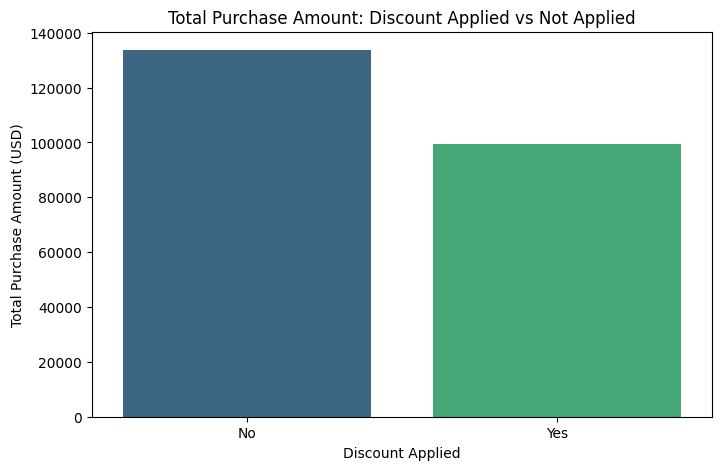

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(discount_analysis, x="discount_applied", y="purchase_amount", palette="viridis")
plt.title("Total Purchase Amount: Discount Applied vs Not Applied")
plt.xlabel("Discount Applied")
plt.ylabel("Total Purchase Amount (USD)")
plt.show()

## How does subscription status affect customer loyalty and value?

In [21]:
subscription_stats = (
    df.groupby("subscription_status")
    .agg(
        avg_spend=("purchase_amount", "mean"),
        avg_previous_purchases=("previous_purchases", "mean"),
        purchase_count=("customer_id", "count")
    )
    .reset_index()
)
subscription_stats.head()

,subscription_status,avg_spend,avg_previous_purchases,purchase_count
0,No,59.865121,25.080436,2847
1,Yes,59.491928,26.084520,1053


/tmp/ipykernel_2817/1993014004.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subscription_stats, x="subscription_status",


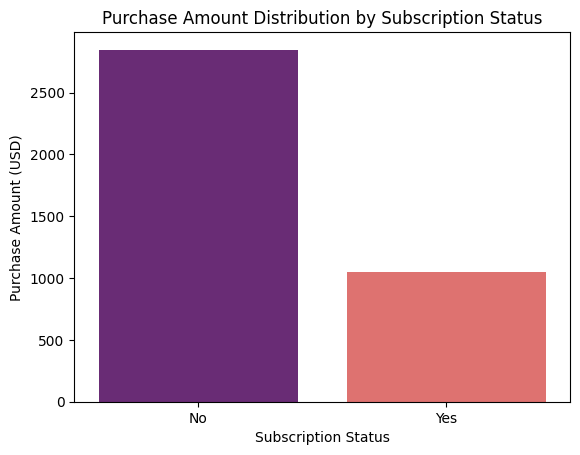

In [22]:
sns.barplot(data=subscription_stats, x="subscription_status",
                y="purchase_count", palette="magma")
plt.title("Purchase Amount Distribution by Subscription Status")
plt.xlabel("Subscription Status")
plt.ylabel("Purchase Amount (USD)")
plt.show()

## Are there seasonal patterns in customer purchases and preferences?

In [23]:
seasonal_revenue = (
    df.groupby("season")["purchase_amount"]
    .sum()
    .reset_index()
)

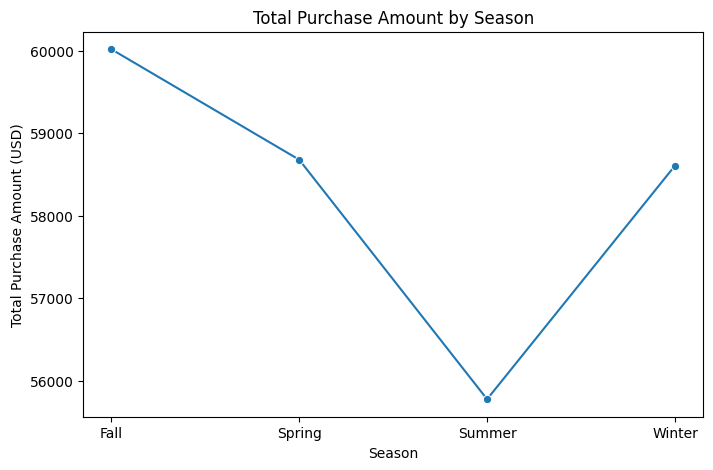

In [24]:
plt.figure(figsize=(8,5))
sns.lineplot( data=seasonal_revenue,
    x="season",
    y="purchase_amount",
    marker="o")
plt.title("Total Purchase Amount by Season")
plt.xlabel("Season")
plt.ylabel("Total Purchase Amount (USD)")
plt.show()


# Statistical Analysis
## Business Question
### Do subscribed customers spend more per purchase than non-subscribed customers?


In [25]:
from scipy.stats import ttest_ind
df[['purchase_amount','subscription_status']].sample(10)

,purchase_amount,subscription_status
2369,23,No
2614,65,No
1782,88,No
2929,53,No
673,66,Yes
56,73,Yes
2760,82,No
1255,68,No
987,47,Yes
911,74,Yes


In [26]:
# Make separate groups
mask1 = df['subscription_status']== 'Yes'
mask2 = df['subscription_status'] == 'No'
subscribed = df[mask1]['purchase_amount']
non_subscribed = df[mask2]['purchase_amount']
subscribed.head()

0    53
1    64
2    73
3    90
4    49
Name: purchase_amount, dtype: int64

In [27]:
print("Subscribed mean:", subscribed.mean())
print("Non-subscribed mean:", non_subscribed.mean())

print("Subscribed count:", subscribed.count())
print("Non-subscribed count:", non_subscribed.count())

Subscribed mean: 59.49192782526116
Non-subscribed mean: 59.865121180189675
Subscribed count: 1053
Non-subscribed count: 2847


In [28]:
# perform t_test
t_stat, p_value = ttest_ind( subscribed, non_subscribed, equal_var = False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -0.4395786253862316
p-value: 0.6602922539880339


In [29]:
# Interpret Result
alpha = 0.05

if p_value < alpha:
    print("Result is statistically significant.")
else:
    print("Result is NOT statistically significant.")

Result is NOT statistically significant.
